# Imports, classes and methods declaration

In [1]:
from google.colab import drive
import sys
import os
import numpy as np

# Local python files imports
drive.flush_and_unmount()
drive.mount("/content/gdrive", force_remount=True)
sys.path.append(os.path.abspath(
    '/content/gdrive/MyDrive/ULPGC/TFT/projects/COVID-detector/')
)

from covid_detector.dataset import Dataset
from covid_detector.models.x_ray.x_ray_model import XRayModel
from covid_detector.models.x_ray.x_ray_constants import (
  DATASET_1_1,
  TRAIN_IMAGES_FILE_PATH,
  TRAIN_LABELS_FILE_PATH,
  TEST_IMAGES_FILE_PATH,
  TEST_LABELS_FILE_PATH
)
from covid_detector.models.utils.plotters import (
  plot_results,
  get_falses,
  plot_images
)
from covid_detector.models.utils.data_management import (
  dataset_images_to_files,
  load_data
)

Mounted at /content/gdrive


# Dataset selector



In [ ]:
dataset = Dataset(DATASET_1_1)

INFO [10/13/21 18:36:28] => Getting images from Non-COVID-19
INFO [10/13/21 18:36:28] => Getting images from COVID-19
INFO [10/13/21 18:45:06] => Splitting dataset into training and test
INFO [10/13/21 18:45:06] => The dataset has been generated successfully
*************************************************
INFO [10/13/21 18:45:07] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_1/train_images
INFO [10/13/21 18:45:18] => The data has been inserted successfully
*************************************************
INFO [10/13/21 18:45:18] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_1/train_labels
INFO [10/13/21 18:45:19] => The data has been inserted successfully
*************************************************
INFO [10/13/21 18:45:19] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_1/test_images
INFO [10/13/21 18:45:22] => The data

In [ ]:
dataset_images_to_files(
    dataset,
    TRAIN_IMAGES_FILE_PATH,
    TRAIN_LABELS_FILE_PATH,
    TEST_IMAGES_FILE_PATH,
    TEST_LABELS_FILE_PATH
)

In [2]:
# Cell in case the dataset files have been created

dataset = Dataset(DATASET_1_1, file_load_mode=True)
load_data(
    dataset,
    TRAIN_IMAGES_FILE_PATH,
    TRAIN_LABELS_FILE_PATH,
    TEST_IMAGES_FILE_PATH,
    TEST_LABELS_FILE_PATH
)

INFO [10/24/21 11:52:33] => Retrieving all the dataset from files
INFO [10/24/21 11:52:41] => All the dataset has been obtained successfully


# Model build

In [10]:
x_ray_model = XRayModel(dataset)

*************************************************
INFO [10/24/21 12:03:20] => Training model
Epoch 1/60
22/22 [==============================] - 7s 279ms/step - loss: 0.7336 - accuracy: 0.5704 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 2/60
22/22 [==============================] - 6s 264ms/step - loss: 0.5545 - accuracy: 0.6892 - val_loss: 0.6433 - val_accuracy: 0.6350
Epoch 3/60
22/22 [==============================] - 6s 265ms/step - loss: 0.3954 - accuracy: 0.8382 - val_loss: 0.3219 - val_accuracy: 0.8759
Epoch 4/60
22/22 [==============================] - 6s 264ms/step - loss: 0.2700 - accuracy: 0.8830 - val_loss: 0.2908 - val_accuracy: 0.8978
Epoch 5/60
22/22 [==============================] - 6s 263ms/step - loss: 0.1915 - accuracy: 0.9324 - val_loss: 0.1995 - val_accuracy: 0.9343
Epoch 6/60
22/22 [==============================] - 6s 266ms/step - loss: 0.1450 - accuracy: 0.9452 - val_loss: 0.1521 - val_accuracy: 0.9526
Epoch 7/60
22/22 [==============================] - 6s 

# Train results

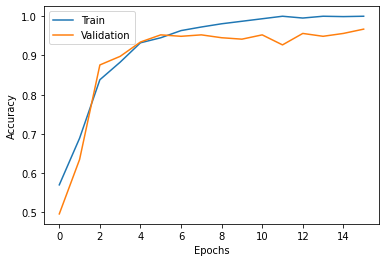

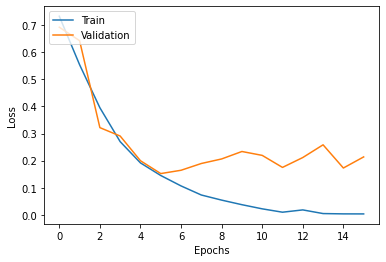

No handles with labels found to put in legend.


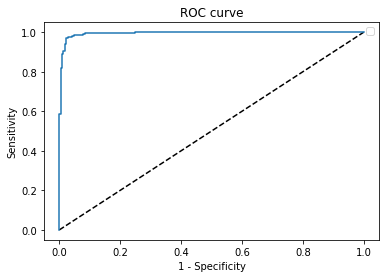

INFO [10/24/21 12:05:47] => Classification report:
              precision    recall  f1-score   support

   Not COVID       0.97      0.97      0.97       221
       COVID       0.97      0.97      0.97       235

    accuracy                           0.97       456
   macro avg       0.97      0.97      0.97       456
weighted avg       0.97      0.97      0.97       456



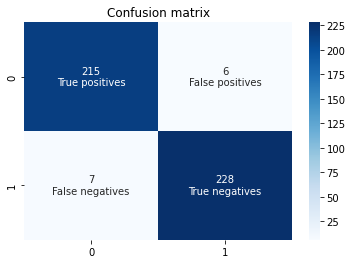

In [11]:
plot_results(dataset.test_images, dataset.test_labels, x_ray_model.results)

# Visualize falses

In [ ]:
false_negatives, false_positives = get_falses(
  dataset.test_images, 
  dataset.test_labels, 
  np.round(x_ray_model.results['Model test predictions'])
)

INFO [10/13/21 18:48:59] => Getting false negatives and positives...
INFO [10/13/21 18:48:59] => Falses report:
- False negatives: 6
- False positives: 8


INFO [10/13/21 18:48:59] => Plotting false negatives


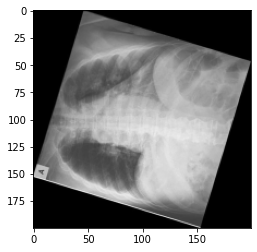

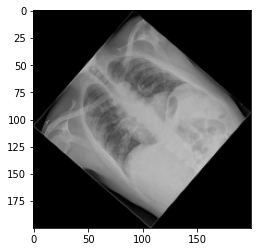

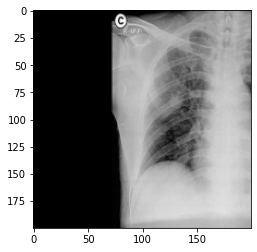

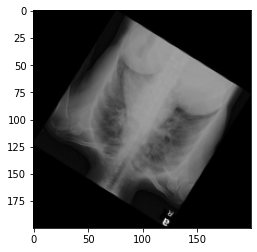

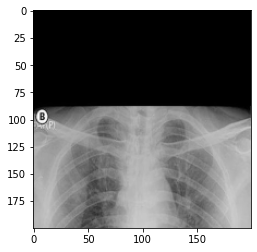

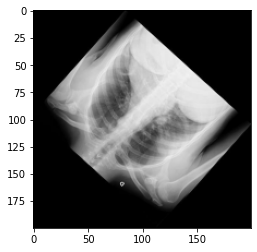

In [ ]:
plot_images(false_negatives, 'false negatives')

INFO [10/13/21 18:49:00] => Plotting false positives


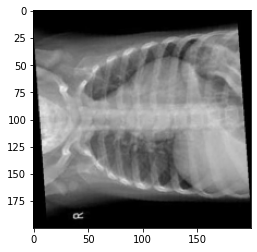

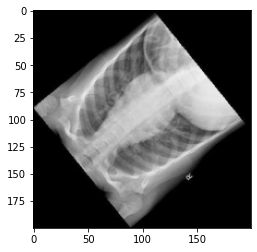

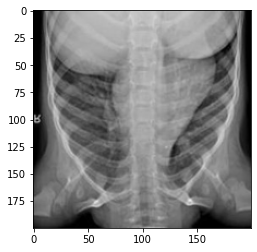

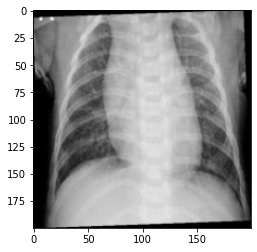

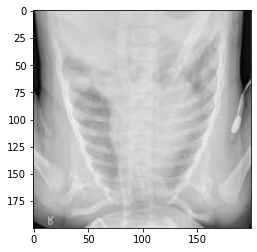

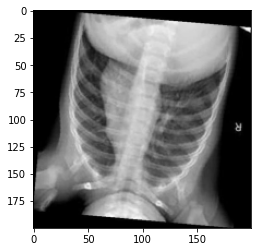

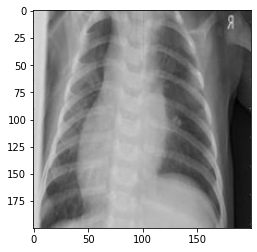

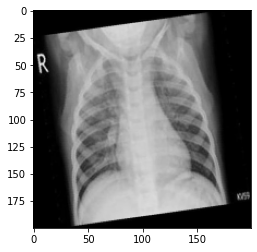

In [ ]:
plot_images(false_positives, 'false positives')